# Modelo Random Forest

Implementado por Jesús David Barrios (j.barrios) - 201921887

### Importar librerías y cargar datos

In [1]:
# Pandas
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

# Numpy
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns 

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt

# Vectorización de texto
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelos
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
# Import SGD Classifier
from sklearn.linear_model import SGDClassifier

# Métricas
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix

# Optimización modelo
from sklearn.model_selection import GridSearchCV

# Guardar modelo
import joblib, pickle


In [2]:
# Importar datos
db_route = '../data/processed_data.csv'
df = pd.read_csv(db_route)

# Imprimir número de filas
print('Número de filas: ', df.shape[0])
# Imprimir número de columnas
print('Número de columnas: ', df.shape[1])
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar

df.sample(5)

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed_data.csv'

In [ ]:
# Contar valores nulos
df.isnull().sum()

class      0
tokens    99
dtype: int64

In [ ]:
# Eliminar valores nulos
df.dropna(inplace=True)

### Separación de datos

In [ ]:
# División entre variables independientes y dependientes
X = df['tokens']
Y = df['class']

In [ ]:
# Vectorización de texto
vectorizer = TfidfVectorizer(max_df=1200, min_df=2, max_features=10000, ngram_range=(1,2))
X_count = vectorizer.fit_transform(X)
print(X_count.shape)

(195601, 10000)


In [ ]:
# Separación de datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_count, Y, test_size=0.2, random_state=42)

### Modelo

In [ ]:
# Parametros para GridSearchCV
parameters = {
    'n_estimators': [100, 120],
    'criterion' : ["gini", "entropy"]
}

In [10]:
# Crear modelo
model = RandomForestClassifier(random_state=42)

# Crear modelo con GridSearchCV
b_model = GridSearchCV(model, parameters, cv=4, n_jobs=-1, verbose=1)
b_model

# Entrenar modelo
b_model.fit(X_train, Y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 120]},
             verbose=1)

### Evaluación

In [11]:
# Predicción
Y_pred = b_model.predict(X_test)

# Evaluación del modelo
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print('F1: ', f1_score(Y_test, Y_pred, average='weighted'))
print('Precision: ', precision_score(Y_test, Y_pred, average='weighted'))
print('Recall: ', recall_score(Y_test, Y_pred, average='weighted'))
print(classification_report(Y_test, Y_pred))

Accuracy:  0.876869200685054
F1:  0.8769471295397717
Precision:  0.8770717948176725
Recall:  0.876869200685054
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     22035
           1       0.85      0.86      0.86     17086

    accuracy                           0.88     39121
   macro avg       0.87      0.88      0.88     39121
weighted avg       0.88      0.88      0.88     39121



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


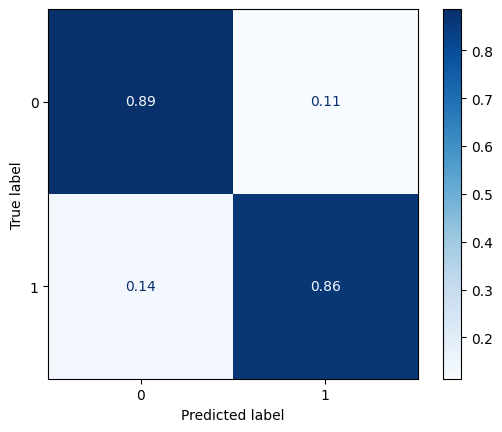

In [12]:
# Matriz de confusión
plot_confusion_matrix(b_model, X_test, Y_test, cmap=plt.cm.Blues, normalize='true')

In [13]:
# Exportar modelo
joblib.dump(b_model, './models/modelo_random_forest.pkl')

['./models/modelo_random_forest.pkl']